First few rows of the train sample:
          Gender  Age  Driving_License  Region_Code  Previously_Insured  \
id                                                                        
2899125   Female   41                1         28.0                   0   
3854901   Female   40                1         28.0                   0   
7377384     Male   31                1         18.0                   0   
10901782  Female   24                1         37.0                   1   
8099641     Male   33                1         28.0                   1   

         Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
id                                                                          
2899125     1-2 Year            Yes         29590.0                 157.0   
3854901     1-2 Year            Yes         42910.0                  13.0   
7377384     < 1 Year            Yes         30375.0                 152.0   
10901782    < 1 Year             No          2630.0  

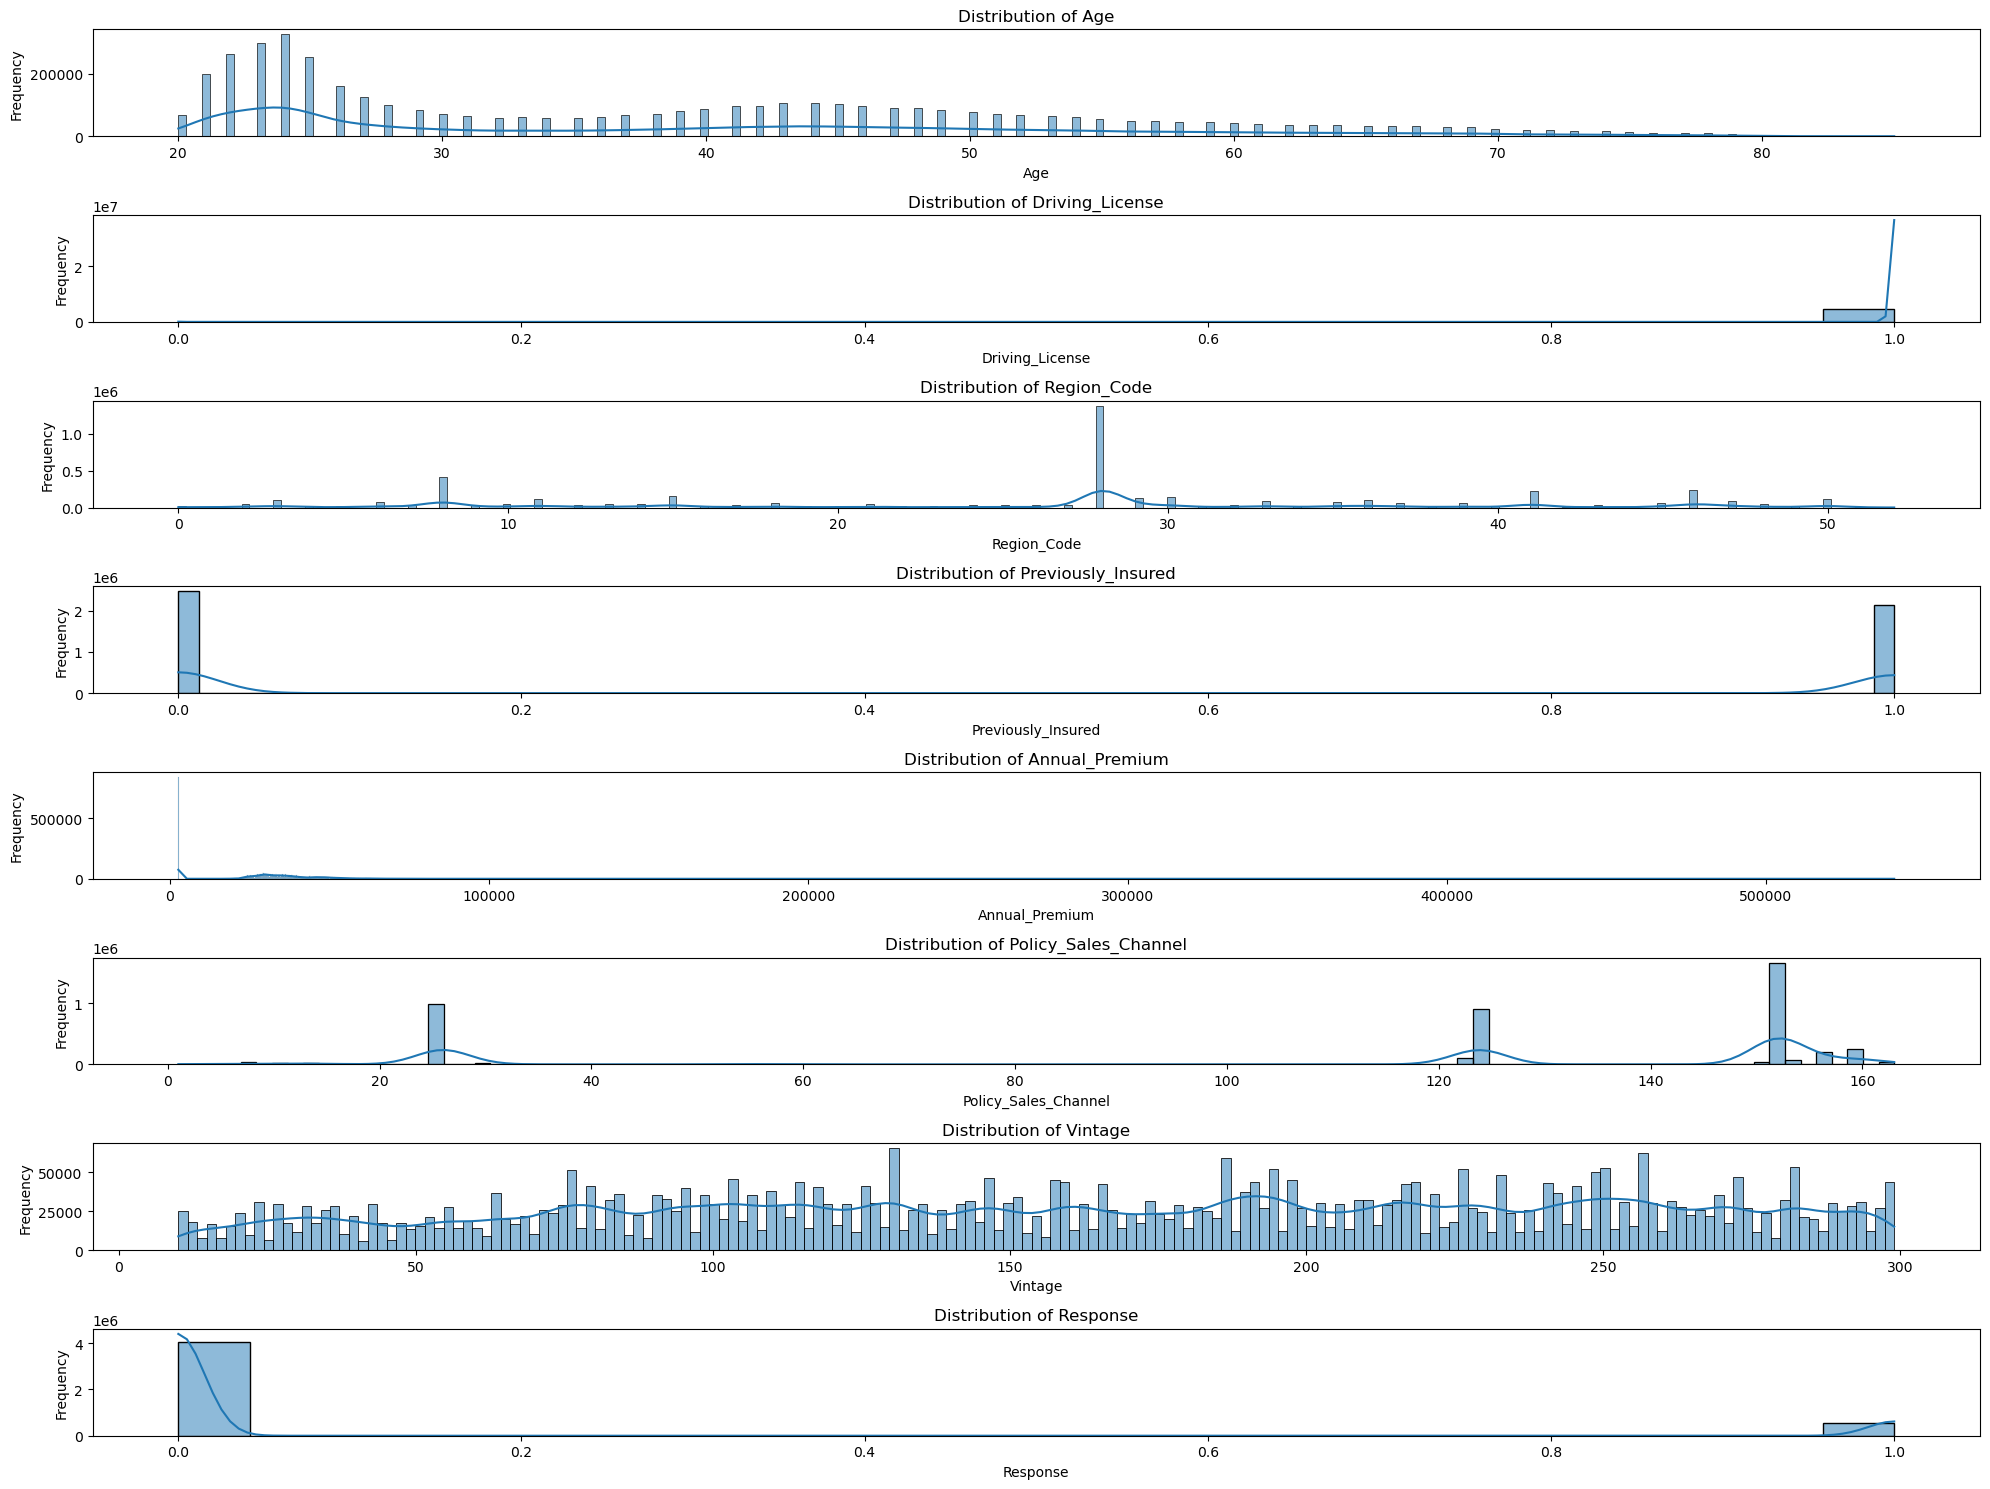

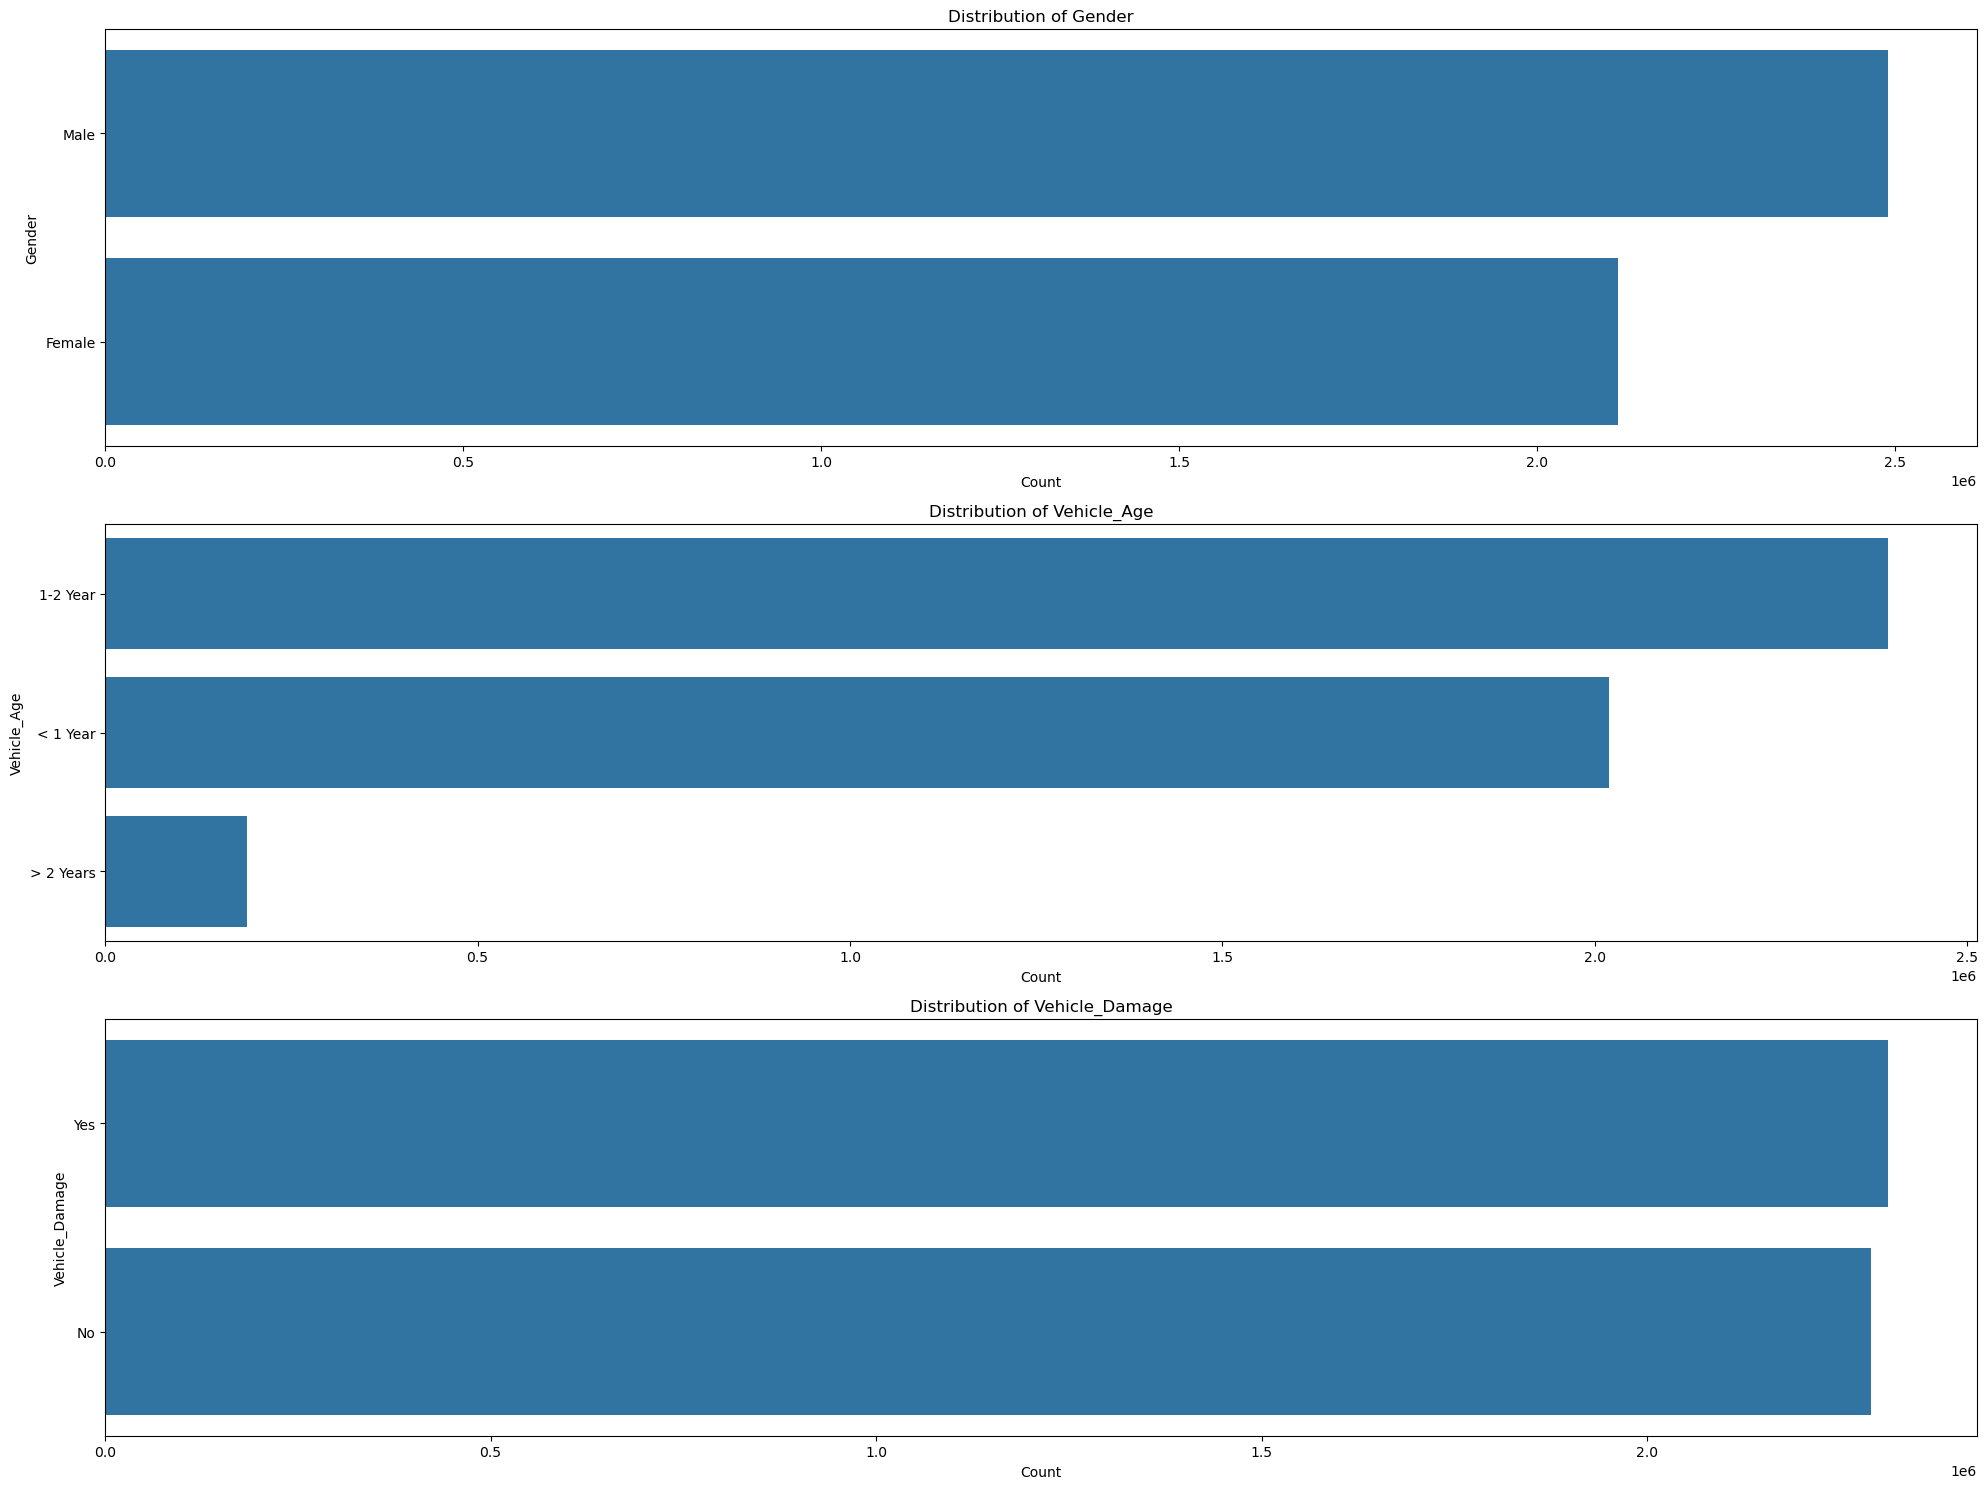

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging

# Setting up the logger
logging.basicConfig(level=logging.INFO, filename='data_processing.log', filemode='w',
                    format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

# Create directories for storing graphs
os.makedirs('graphs', exist_ok=True)

# Load the datasets from the specified path with id column as index
train_path = "C:/Users/paulo/OneDrive/Documents/Binary-Classification-of-Insurance-Cross-Selling/train.csv"
test_path = "C:/Users/paulo/OneDrive/Documents/Binary-Classification-of-Insurance-Cross-Selling/test.csv"

logger.info("Loading datasets...")
train_df = pd.read_csv(train_path, index_col='id')
test_df = pd.read_csv(test_path, index_col='id')

logger.info("Datasets loaded successfully.")
logger.info("Train dataset shape: %s", train_df.shape)
logger.info("Test dataset shape: %s", test_df.shape)

# Use a 40% sample of the data
logger.info("Sampling 40% of the data...")
train_sample = train_df.sample(frac=0.4, random_state=42)
test_sample = test_df.sample(frac=0.4, random_state=42)

logger.info("Train sample shape: %s", train_sample.shape)
logger.info("Test sample shape: %s", test_sample.shape)

# Display the first few rows of the train sample
print("First few rows of the train sample:")
print(train_sample.head())
logger.info("First few rows of the train sample:\n%s", train_sample.head())

# Display the first few rows of the test sample
print("First few rows of the test sample:")
print(test_sample.head())
logger.info("First few rows of the test sample:\n%s", test_sample.head())

# Display basic information of the train sample
print("\nBasic Information of the Train Sample:")
train_sample_info = train_sample.info()
print(train_sample_info)
logger.info("Basic Information of the Train Sample:\n%s", train_sample_info)

# Display basic statistics of the train sample
print("\nBasic Statistics of the Train Sample:")
train_sample_describe = train_sample.describe()
print(train_sample_describe)
logger.info("Basic Statistics of the Train Sample:\n%s", train_sample_describe)

# Check for missing values in the train sample
print("\nMissing Values in the Train Sample:")
train_sample_missing = train_sample.isnull().sum()
print(train_sample_missing)
logger.info("Missing Values in the Train Sample:\n%s", train_sample_missing)

# Check for missing values in the test sample
print("\nMissing Values in the Test Sample:")
test_sample_missing = test_sample.isnull().sum()
print(test_sample_missing)
logger.info("Missing Values in the Test Sample:\n%s", test_sample_missing)

# Visualize the distribution of numerical features
numerical_features = train_sample.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)
    sns.histplot(train_sample[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('graphs/numerical_features_distribution.png')
plt.show()
logger.info("Saved distribution plot for numerical features")

# Visualize the distribution of categorical features
categorical_features = train_sample.select_dtypes(include=['object']).columns

plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(len(categorical_features), 1, i)
    sns.countplot(y=train_sample[feature], order=train_sample[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)

plt.tight_layout()
plt.savefig('graphs/categorical_features_distribution.png')
plt.show()
logger.info("Saved distribution plot for categorical features")

logger.info("Data processing and visualization completed.")
